In [110]:
%pylab inline
import pandas as pd
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_rows', 500)

Populating the interactive namespace from numpy and matplotlib


In [76]:
def listflatten2(l,key='affiliation'
                  ,internalkey='authors'):
    '''
    For a list of dictionaries get each
    dictionary item associted to `key`
    '''
    try:
        ll=[ [dd.get(key) 
             for dd in d.get(internalkey)] 
              for d in l]
        l= [item for sublist in ll for item in sublist]
        le=[]
        for j in l:
            if isinstance(j,str):
                le.append(j)
            elif isinstance(j,list):
                for k in j:
                    le.append(k)
    except:
        le=[]
    return le

In [3]:
df=pd.read_json('gfif.json.gz',compression='gzip')

In [96]:
aumax=10
df['cites_insitutions']=df.cites.apply(lambda l: [ #Filer citations with many authors
                 d for d in l if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                         ]  if isinstance(l,list) else None 
        ).apply(listflatten2 #Obtain affiliations
        ).apply( lambda l: #select unique affiliations
            np.unique(l) if isinstance(l,list) else [] 
        )#.apply(len)

In [145]:
df

,DOI,FIXME_OAI,ISSN,Journal_name,Year,abbreviated_title,abstract,accelerator_experiment,authors,cataloguer_info,...,system_control_number,system_number,thesaurus_terms,title,title_TeX,title_additional,udea_authors,url,version_id,cites_insitutions
0,10.1016/j.physletb.2020.135203,"{'set': ['CERN', 'INSPIRE:HEP', 'CERN:arXiv', 'CDS'], 'id': 'oai:inspirehep.net:1764794'}",0370-2693,Physics Letters B,2020,None,[{'summary': 'The observation of the $\Lambda_\mathrm{b}^0 \to$J/$\psi \Lambda \phi$ decay is reported using proton-proton collision data collected at $\sqrt{s} =$ 13 TeV by the CMS experiment at ...,{'experiment': 'CERN-LHC-CMS'},"[{'last_name': 'Sirunyan', 'INSPIRE_number': 'INSPIRE-00312131', 'full_name': 'Sirunyan, Albert M', 'first_name': 'Albert M', 'affiliation': 'Yerevan Phys. Inst.'}, {'last_name': 'Tumasyan', 'INSP...",{'creation_date': '2019-11-14'},...,"[{'institute': 'arXiv', 'value': 'oai:arXiv.org:1911.03789'}, {'institute': 'INSPIRETeX', 'value': 'Sirunyan:2019dwp'}, {'institute': 'CDS', 'value': '2699879'}, {'institute': 'DESY', 'canceled': ...",None,"[{'term': 'p p: scattering'}, {'term': 'p p: colliding beams'}, {'term': 'Lambda/b0: hadroproduction'}, {'term': 'Lambda/b0: hadronic decay'}, {'term': 'J/psi(3100)'}, {'term': 'Lambda'}, {'term':...",{'title': 'Observation of the $\Lambda_\mathrm{b}^0 \to$ J/$\psi \Lambda \phi$ decay in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},Observation of the $\Lambda_\mathrm{b}^0 \to$ J/$\psi \Lambda \phi$ decay in proton-proton collisions at $\sqrt{s}=$ 13 TeV,{'title': 'Observation of the Λb0→J/ψΛϕ decay in proton-proton collisions at s=13TeV'},"[Jhovanny Mejia Guisao, José David Ruiz Alvarez, Camilo Andrés Salazar González, Nelson Vanegas Arbelaez]",None,2020-02-05T01:53:06,[]
1,10.1103/PhysRevLett.124.041803,"{'set': ['CERN', 'INSPIRE:HEP', 'CERN:arXiv', 'CDS'], 'id': 'oai:inspirehep.net:1757579'}",0031-9007,Physical Review Letters,2020,None,"[{'summary': 'The first search for supersymmetry in events with an experimental signature of one soft, hadronically decaying $\tau$ lepton, one energetic jet from initial-state radiation, and larg...",{'experiment': 'CERN-LHC-CMS'},"[{'last_name': 'Sirunyan', 'INSPIRE_number': 'INSPIRE-00312131', 'full_name': 'Sirunyan, Albert M', 'first_name': 'Albert M', 'affiliation': 'Yerevan Phys. Inst.'}, {'last_name': 'Tumasyan', 'INSP...",{'creation_date': '2019-10-07'},...,"[{'institute': 'arXiv', 'value': 'oai:arXiv.org:1910.01185'}, {'institute': 'INSPIRETeX', 'value': 'Sirunyan:2019mlu'}, {'institute': 'CDS', 'value': '2691942'}, {'institute': 'OSTI', 'value': '15...",None,"[{'term': 'p p: scattering'}, {'term': 'p p: colliding beams'}, {'term': 'transverse momentum: missing-energy'}, {'term': 'dark matter: relic density'}, {'term': 'radiation: initial-state interact...","{'title': 'Search for supersymmetry with a compressed mass spectrum in events with a soft $\tau$ lepton, a highly energetic jet, and large missing transverse momentum in proton-proton collisions a...","Search for supersymmetry with a compressed mass spectrum in events with a soft $\tau$ lepton, a highly energetic jet, and large missing transverse momentum in proton-proton collisions at $\sqrt{s}...","{'title': 'Search for Supersymmetry with a Compressed Mass Spectrum in Events with a Soft τ Lepton, a Highly Energetic Jet, and Large Missing Transverse Momentum in Proton-Proton Collisions at s=1...","[Jhovanny Mejia Guisao, José David Ruiz Alvarez, Camilo Andrés Salazar González, Nelson Vanegas Arbelaez]",None,2020-02-04T09:54:40,"[Henan Normal U., Munster U., ITP]"
10,10.1140/epjc/s10052-019-7593-7,"{'set': ['CERN', 'INSPIRE:HEP', 'CERN:arXiv', 'CDS'], 'id': 'oai:inspirehep.net:1750186'}",1434-6044,The European Physical Journal C,2020,None,[{'summary': 'The standard model (SM) production of four top quarks ($\text {t} {}{\overline{\text {t}}} \text {t} {}{\overline{\text {t}}} $) in proton–proton collisions is studied by the CMS Col...,{'experiment': 'CERN-LHC-

In [119]:
nc=df[df.authors.apply(len)<10].reset_index(drop=True)

In [168]:
df['number_of_cites_institutions']=df['cites_insitutions'].apply(len)

In [169]:
df[['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'Year',ascending=False#'number_of_cites_insitutions',ascending=False#'number_of_citations',ascending=False
        ).reset_index(drop=True)

,title,number_of_citations,number_of_cites_institutions,Year
0,{'title': 'Observation of the $\Lambda_\mathrm{b}^0 \to$ J/$\psi \Lambda \phi$ decay in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},1,0,2020
1,{'title': 'Combined search for supersymmetry with photons in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},1,1,2020
2,{'title': 'Evidence for WW production from double-parton interactions in proton-proton collisions at $\sqrt{s} =$ 13 TeV'},5,5,2020
3,{'title': 'Search for light pseudoscalar boson pairs produced from decays of the 125 GeV Higgs boson in final states with two muons and two nearby tracks in pp collisions at $\sqrt{s}=$ 13 TeV'},6,10,2020
4,{'title': 'Search for a charged Higgs boson decaying into top and bottom quarks in events with electrons or muons in proton-proton collisions at $ \sqrt{\mathrm{s}} $ = 13 TeV'},6,13,2020
5,{'title': 'Searches for physics beyond the standard model with the $M_\mathrm{T2}$ variable in hadronic final states with and without disappearing tracks in proton-proton collisions at $\sqrt{s}=$...,5,14,2020
6,{'title': 'Measurement of electroweak production of a W boson in association with two jets in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},8,4,2020
7,{'title': 'Dirac neutrino mass generation from Majorana messenger'},1,2,2020
8,"{'title': 'Search for supersymmetry with a compressed mass spectrum in events with a soft $\tau$ lepton, a highly energetic jet, and large missing transverse momentum in proton-proton collisions a...",3,2,2020
9,{'title': 'Search for production of four top quarks in final states with same-sign or multiple leptons in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},12,15,2020


In [32]:
nc=df[df.authors.apply(len)<10].reset_index(drop=True)

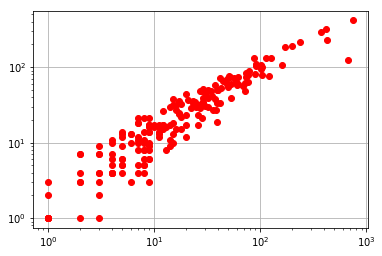

In [171]:
plt.loglog(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()

(0, 25)

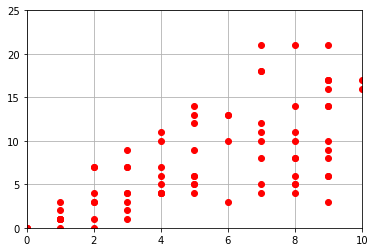

In [196]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(0,10)
plt.ylim(0,25)

(10, 80)

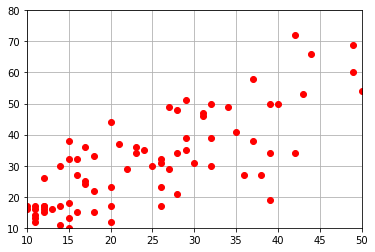

In [202]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(10,50)
plt.ylim(10,80)

(50, 140)

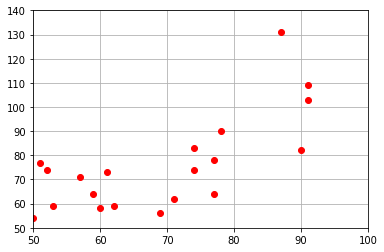

In [213]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(50,100)
plt.ylim(50,140)

(100, 500)

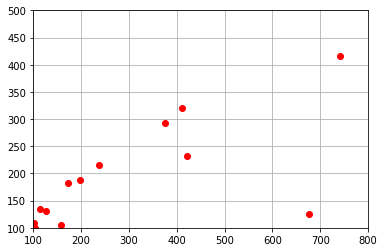

In [215]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(100,800)
plt.ylim(100,500)

In [191]:
df[np.logical_and( df['number_of_citations']==5,df['number_of_cites_insititutions']>0        )
  ][['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False)#'number_of_citations',ascending=False

,title,number_of_citations,number_of_cites_institutions,Year
7,{'title': 'Searches for physics beyond the standard model with the $M_\mathrm{T2}$ variable in hadronic final states with and without disappearing tracks in proton-proton collisions at $\sqrt{s}=$...,5,14,2020
28,{'title': 'Search for vector-like leptons in multilepton final states in proton-proton collisions at $\sqrt{s}$ = 13 TeV'},5,13,2019
55,"{'title': 'Measuring the mass, width, and couplings of semi-invisible resonances with the Matrix Element Method'}",5,12,2019
78,{'title': 'Minimal nonuniversal electroweak extensions of the standard model: A chiral multiparameter solution'},5,9,2017
173,{'title': 'An [SU(3)]**4 supersymmetric grand unified model'},5,6,1999
30,{'title': 'Search for low-mass quark-antiquark resonances produced in association with a photon at $\sqrt{s} = $ 13 TeV'},5,6,2019
180,{'title': 'Symmetry breaking in SU(6)**3 x Z(3)'},5,5,1997
4,{'title': 'Evidence for WW production from double-parton interactions in proton-proton collisions at $\sqrt{s} =$ 13 TeV'},5,5,2020
14,{'title': 'Search for anomalous triple gauge couplings in WW and WZ production in lepton + jet events in proton-proton collisions at $\sqrt{s} =$ 13 TeV'},5,4,2019


In [180]:
kk=df[np.logical_and( df['number_of_citations']>300,df['number_of_cites_insititutions']>0        )
  ]
kk[['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False)#'number_of_citations',ascending=False

,title,number_of_citations,number_of_cites_institutions,Year
135,{'title': 'Leptogenesis'},742,416,2008
193,{'title': 'Measurement of Higgs Boson Production and Properties in the WW Decay Channel with Leptonic Final States'},412,321,2014
101,{'title': 'Search for the Standard Model Higgs Boson Produced in Association with a W or a Z Boson and Decaying to Bottom Quarks'},375,293,2014
147,{'title': 'The Importance of flavor in leptogenesis'},422,232,2006
191,{'title': 'Particle-flow reconstruction and global event description with the CMS detector'},677,125,2017


In [184]:
kk=df[np.logical_and( df['number_of_citations']>10,df['number_of_citations']<20       )
  ]
kk[['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False)#'number_of_citations',ascending=False

,title,number_of_citations,number_of_cites_institutions,Year
82,{'title': 'Radiative Type III Seesaw Model and its collider phenomenology'},15,38,2016
89,{'title': 'Diboson anomaly: Heavy Higgs resonance and QCD vectorlike exotics'},17,36,2016
107,{'title': 'Baryonic violation of $R$ parity from anomalous $U(1)_H$'},18,33,2013
48,"{'title': 'Probing a simplified, $W^{\prime}$ model of $R(D^{(\ast)})$ anomalies using $b$-tags, $\tau$ leptons and missing energy'}",16,32,2018
39,{'title': 'Observation of Single Top Quark Production in Association with a $Z$ Boson in Proton-Proton Collisions at $\sqrt {s}$ =13 TeV'},15,32,2019
88,{'title': 'The Inert Zee Model'},14,30,2016
141,{'title': 'Phenomenology of the SU(3)(c) x SU(3)(L) x U(1)(X) model with exotic charged leptons'},16,27,2007
23,{'title': 'Search for pair production of vectorlike quarks in the fully hadronic final state'},12,26,2019
61,{'title': 'Measurements of jet charge with dijet events in pp collisions at $\sqrt{s}=8$ TeV'},17,25,2017
134,{'title': 'Novel Higgs decay signals in R-parity violating models'},17,24,2008


In [143]:
kkk[['title','number_of_citations','nuaber_of_cites_insitutions','Year','cites']]

,title,number_of_citations,number_of_cites_insitutions,Year,cites
0,{'title': 'Dirac neutrino mass generation from Majorana messenger'},1,36,2020,"[{'authors': [{'last_name': 'Jana', 'affiliation': ['Heidelberg, Max Planck Inst.', 'Oklahoma State U.'], 'full_name': 'Jana, Sudip', 'first_name': 'Sudip'}, {'last_name': 'Vishnu', 'affiliation':..."


In [146]:
kkk.cites.apply(lambda l: [ #Filer citations with many authors
                 d for d in l if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                         ]  if isinstance(l,list) else None 
        ).apply(listflatten2 #Obtain affiliations
        ).apply( lambda l: #select unique affiliations
            np.unique(l) if isinstance(l,list) else [] 
        ).apply(len)

0    2
Name: cites, dtype: int64

In [157]:
df.number_of_citations.sum()

7910

In [30]:
nc.cites.apply(lambda l: listflatten2(l) if isinstance(l,list) else []).apply(len)#.loc[2]#.apply(
    #lambda l: np.unique(l).shape[0])

0       275
1        31
2      4840
3        36
4        25
5       325
6        93
7       182
8         6
9       367
10       28
11        6
12      153
13       11
14       20
15       30
16      331
17      167
18       70
19       35
20       36
21       90
22       28
23       71
24      101
25      109
26      970
27      308
28      119
29        0
       ... 
99       54
100       0
101    1197
102      15
103      87
104      21
105    5168
106      18
107      31
108      11
109       9
110      34
111      21
112      35
113       1
114     167
115      65
116      50
117      24
118      94
119     122
120     137
121      62
122      64
123      77
124     305
125     162
126     590
127     157
128     287
Name: cites, Length: 129, dtype: int64

In [38]:
m.cites.apply(lambda l: [ [dd.get('affiliation') for dd in d.get('authors')] for d in l]
             ).apply(lambda ll: [item for sublist in ll for item in sublist]  
             ).apply(getitems).apply(pd.Series).stack().unique()#.loc[92]#.apply(lambda l: [j if isinstance(j,str) else None for j in l ]).loc[92]

array(['Oklahoma State U.', 'UC, Riverside', 'Santa Maria U., Valparaiso',
       'Valencia U.', 'Heidelberg, Max Planck Inst.', 'Antioquia U.',
       'IIP, Brazil', 'Lisbon, CFTP', 'Lisbon, ISEL',
       'Shanghai Jiaotong U.', 'Valencia U., IFIC', 'Mexico U.',
       'Loyola U., Chicago', 'Munich, Tech. U.', 'UNAM, Mexico'],
      dtype=object)

In [42]:
np.unique( 
    m.cites.apply(lambda l: [ [dd.get('affiliation') for dd in d.get('authors')] for d in l]
             ).apply(lambda ll: [item for sublist in ll for item in sublist]  
             ).apply(getitems).values[0]
         )

array(['Antioquia U.', 'Heidelberg, Max Planck Inst.', 'IIP, Brazil',
       'Lisbon, CFTP', 'Lisbon, ISEL', 'Loyola U., Chicago', 'Mexico U.',
       'Munich, Tech. U.', 'Oklahoma State U.',
       'Santa Maria U., Valparaiso', 'Shanghai Jiaotong U.',
       'UC, Riverside', 'UNAM, Mexico', 'Valencia U.',
       'Valencia U., IFIC'], dtype='<U28')